In [1]:
import mne as mne
import numpy as np
import pandas as pd
import torch as torch
import time
from tqdm import tqdm
from openpyxl import load_workbook

from preprocessing import Preprocessing

In [2]:
wb = load_workbook('topo.xlsx')
sheets = wb.worksheets

sheet1 = sheets[0]
topo = []
for i in range(64):
    line = []
    for j in range(64):
        line.append(sheet1.cell(i + 3, j + 3).value)
    topo.append(line)

topo_map = torch.tensor(topo).to(torch.float32).cuda()

In [3]:
labels = pd.read_csv('/home/dhz/bci-data/ds003478-download/participants.tsv', sep='\t', header=0)
col = labels.columns
col = col[[0, 1, 2, 3, 5, 6, 7, 8]]
labels = labels.drop(col, axis=1)

labels = np.array(labels)

labels[37] = 0.

In [4]:
train_data = []
for i in range(30):
    train_data.append(Preprocessing(i + 1).getData())

train_data = np.array(train_data)
train_labels = labels[0 : 30]

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-003/eeg/sub-003_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-005/eeg/sub-005_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33199  =      0.000 ...    66.398 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-006/eeg/sub-006_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '175', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-007/eeg/sub-007_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-008/eeg/sub-008_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-009/eeg/sub-009_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-010/eeg/sub-010_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-011/eeg/sub-011_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-012/eeg/sub-012_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '240', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-013/eeg/sub-013_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-014/eeg/sub-014_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-015/eeg/sub-015_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33205  =      0.000 ...    66.410 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-016/eeg/sub-016_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '13', '14', '15', '16', '17', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.30

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-017/eeg/sub-017_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-018/eeg/sub-018_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-019/eeg/sub-019_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-020/eeg/sub-020_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidt

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 4.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-021/eeg/sub-021_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-022/eeg/sub-022_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-023/eeg/sub-023_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-024/eeg/sub-024_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-025/eeg/sub-025_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '240', '3', '4', '5', '6']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)


/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-026/eeg/sub-026_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33204  =      0.000 ...    66.408 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-027/eeg/sub-027_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transit

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 13 components


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-028/eeg/sub-028_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to d

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-029/eeg/sub-029_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-030/eeg/sub-030_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


In [5]:
from subDataset import subDataset

train_dataset = subDataset(train_data, train_labels)

In [6]:
import torch.utils.data.dataloader as DataLoader

train_loader = DataLoader.DataLoader(train_dataset,batch_size= 1, shuffle = False)

In [7]:
test_data = []
for i in range(20):
    test_data.append(Preprocessing(30 + i + 1).getData())

test_data = np.array(test_data)
test_labels = labels[30 : 50]

Reading /home/dhz/bci-data/ds003478-download/sub-031/eeg/sub-031_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-032/eeg/sub-032_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-033/eeg/sub-033_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['13', '14', '15', '16', '17', '255', '3', '4', '5', '6', 'boundary']
Reading 0 ... 25243  =      0.000 ...    50.486 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting I

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Fitting ICA took 1.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-034/eeg/sub-034_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 31341  =      0.000 ...    62.682 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to d

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-035/eeg/sub-035_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 4.7s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-036/eeg/sub-036_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-037/eeg/sub-037_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-038/eeg/sub-038_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-039/eeg/sub-039_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transit

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 14.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


/home/dhz/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Reading /home/dhz/bci-data/ds003478-download/sub-040/eeg/sub-040_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 14.2s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


/home/dhz/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Reading /home/dhz/bci-data/ds003478-download/sub-041/eeg/sub-041_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-042/eeg/sub-042_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '240', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-043/eeg/sub-043_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 1.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-044/eeg/sub-044_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-045/eeg/sub-045_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 13 components


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-046/eeg/sub-046_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to data using 64

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-047/eeg/sub-047_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-048/eeg/sub-048_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-049/eeg/sub-049_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-050/eeg/sub-050_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fittin

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


In [8]:
test_dataset = subDataset(test_data, test_labels)
test_loader = DataLoader.DataLoader(test_dataset,batch_size= 1, shuffle = False)

In [77]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        # self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.attention_net = []
        for i in range(64):
            self.attention_net.append(nn.Sequential(
            nn.Linear(64, 128, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(128, 64, bias=False),
            nn.Sigmoid()
        ).cuda())
        self.conv1= nn.Sequential(
            nn.Conv1d(
                in_channels=64,
                out_channels=32,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.conv2= nn.Sequential(
            nn.Conv1d(
                in_channels=32,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.conv3= nn.Sequential(
            nn.Conv1d(
                in_channels=16,
                out_channels=8,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.conv4= nn.Sequential(
            nn.Conv1d(
                in_channels=8,
                out_channels=4,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.conv5= nn.Sequential(
            nn.Conv1d(
                in_channels=4,
                out_channels=2,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.conv6= nn.Sequential(
            nn.Conv1d(
                in_channels=2,
                out_channels=1,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.out=nn.Linear(16,1)

    def forward(self,x):
        # attention = self.avg_pool(x)
        # attention = self.fc(attention.reshape(1, 64)).unsqueeze(2).repeat(1, 1, 1024)
        xmean = x[0].mean(axis=1).reshape((1,64))
        att = xmean * topo_map
        attention = []
        for i in range(64):
            net = self.attention_net[i]
            attention.append(net(att[i]))
        attentions = torch.tensor([item.cpu().detach().numpy() for item in attention]).cuda()
        attentions = attentions.reshape(1, 64, 64)
        x = attentions.matmul(x)
        x= self.conv1(x)
        x= self.conv2(x)
        x= self.conv3(x)
        x= self.conv4(x)
        x= self.conv5(x)
        x= self.conv6(x)
        output = self.out(x)
        return output.reshape((1, 1))

In [78]:
def accuracy(predictions,labels):
    criterion1 = torch.nn.MSELoss()
    MSE = criterion1(predictions, labels)
    return MSE,len(labels)

In [83]:
net=CNN()
net = net.cuda()

critertion=nn.MSELoss()

optimizer =torch.optim.Adam(net.parameters(),lr=0.001)

In [84]:
num_epoche = 200
loss_list = []
mse_list = []
for epoch in range(num_epoche):
    train_rights=0.
    losses = 0.
    pbar = tqdm(train_loader, total=len(train_data), leave=True, ncols=80)
    pbar.set_description(f'epoch {(epoch + 1)}/{num_epoche}')
    for batch_idx,(data,target) in enumerate(pbar):
        data = data.cuda()
        target = target.cuda()
        net.train()
        output = net(data)
        loss = critertion(output, target)
        optimizer.zero_grad()
        loss.to(torch.float32)
        losses += loss.item()
        loss.backward()
        optimizer.step()
        
        pbar.set_postfix(loss = losses / (batch_idx + 1))
        
        if (batch_idx + 1) % len(train_data) == 0:
            mses = 0.
            for batch_id, (x, y) in enumerate(test_loader):
                x = x.cuda()
                y = y.cuda()
                pred = net(x)
                mse, length = accuracy(pred, y)
                mses += mse.item()
            pbar.set_postfix(loss = losses / (batch_idx + 1), mse = mses / len(test_data))
            if ((epoch + 1) % 10 == 0) or (epoch == 0):
                mse_list.append(mses / len(test_data))
                loss_list.append(losses / (batch_idx + 1))

epoch 28/200:  63%|███████████▍      | 19/30 [00:00<00:00, 69.42it/s, loss=4.79]


KeyboardInterrupt: 

In [1]:
from data_package import *
train_loader, test_loader = get_dataset()

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-003/eeg/sub-003_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 sa

/home/dhz/experiment-BCI/preprocessing.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(self.file_dir)
/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-005/eeg/sub-005_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33199  =      0.000 ...    66.398 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to data using 64

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-006/eeg/sub-006_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '175', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-007/eeg/sub-007_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-008/eeg/sub-008_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-009/eeg/sub-009_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33200  =      0.000 ...    66.400 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Reading /home/dhz/bci-data/ds003478-download/sub-010/eeg/sub-010_task-Rest_run-01_eeg.fdt
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Reading 0 ... 33201  =      0.000 ...    66.402 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302

/home/dhz/experiment-BCI/preprocessing.py:30: RuntimeWarning: DigMontage is only a subset of info. There are 12 channel positions not present in the DigMontage. The required channels are:

['FP1', 'FPZ', 'FP2', 'FZ', 'FCZ', 'CZ', 'CPZ', 'PZ', 'POZ', 'CB1', 'OZ', 'CB2'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw_cropped.set_montage('standard_1020', on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Selecting by number: 13 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


KeyboardInterrupt: 

In [126]:
from topo_attention import *
topo_loss_list, topo_mse_list = run(train_loader, test_loader)

epoch 100/100: 100%|███████| 30/30 [00:00<00:00, 128.73it/s, loss=4.1, mse=1.86]


In [2]:
from topo_att_enhance import *
enhance_loss_list, enhance_mse_list = run(train_loader, test_loader)

epoch 1/100:   0%|                                       | 0/30 [00:00<?, ?it/s]/home/dhz/experiment-BCI/topo_att_enhance.py:117: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  attentions = torch.tensor([item.cpu().detach().numpy() for item in attention]).cuda()
epoch 100/100: 100%|███████| 30/30 [00:00<00:00, 38.63it/s, loss=4.17, mse=1.88]


In [115]:
from orig_cnn import *
orig_loss_list, orig_mse_list = orig_run(train_loader, test_loader)

epoch 100/100: 100%|██████| 30/30 [00:00<00:00, 134.25it/s, loss=4.15, mse=1.87]


In [90]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager

fontdict = {'family': 'STIXGeneral'}

In [91]:
font_list = [x.name for x in font_manager.fontManager.ttflist]

In [92]:
font_list

['cmss10',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'cmmi10',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'cmr10',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'cmsy10',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'cmtt10',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'cmex10',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmb10',
 'DejaVu Serif',
 'C059',
 'Yrsa',
 'Garuda',
 'Noto Sans Oriya',
 'Noto Serif Thai',
 'Chilanka',
 'Noto Sans CJK JP',
 'Noto Serif Ahom',
 'Tlwg Mono',
 'KacstQurn',
 'Noto Sans Cham',
 'Tlwg Typo',
 'Kinnari',
 'Liberation Mono',
 'UnJamoDotum',
 'MathJax_Script',
 'Kinnari',
 'Likhan',
 'Noto Serif CJK JP',
 'DejaVu Serif',
 'Noto Serif CJK JP',
 'Noto 

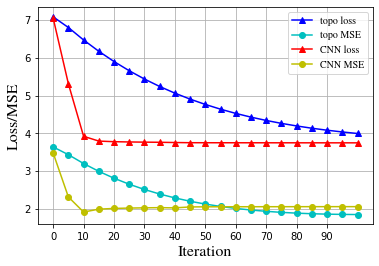

In [37]:
iterate = range(0, 100, 10)
plt.plot(topo_loss_list, 'b^-', topo_mse_list, 'co-', orig_loss_list, 'r^-', orig_mse_list, 'yo-')
plt.xlabel("Iteration", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.ylabel("Loss/MSE", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.xticks(range(0,20,2), iterate)
plt.grid(True)
plt.legend(['topo loss', 'topo MSE', 'CNN loss', 'CNN MSE'], prop=fontdict)
plt.show()

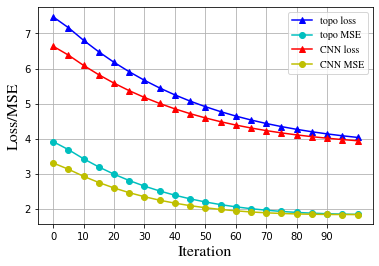

In [78]:
iterate = range(0, 100, 10)
plt.plot(topo_loss_list, 'b^-', topo_mse_list, 'co-', orig_loss_list, 'r^-', orig_mse_list, 'yo-')
plt.xlabel("Iteration", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.ylabel("Loss/MSE", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.xticks(range(0,20,2), iterate)
plt.grid(True)
plt.legend(['topo loss', 'topo MSE', 'CNN loss', 'CNN MSE'], prop=fontdict)
plt.show()

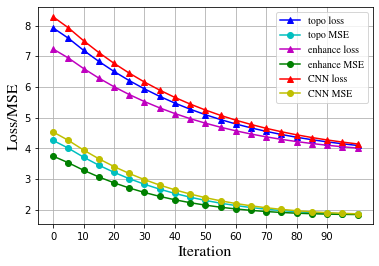

In [127]:
iterate = range(0, 100, 10)
plt.plot(topo_loss_list, 'b^-', topo_mse_list, 'co-',
         enhance_loss_list, 'm^-', enhance_mse_list, 'go-',
         orig_loss_list, 'r^-', orig_mse_list, 'yo-')
plt.xlabel("Iteration", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.ylabel("Loss/MSE", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.xticks(range(0,20,2), iterate)
plt.grid(True)
plt.legend(['topo loss', 'topo MSE', 'enhance loss', 'enhance MSE', 'CNN loss', 'CNN MSE'], prop=fontdict)
plt.show()

In [128]:
res_dict = {'tl': topo_loss_list, 'tm': topo_mse_list,
           'el': enhance_loss_list, 'em': enhance_mse_list,
           'ol': orig_loss_list, 'om': orig_mse_list}

In [129]:
import json
res_json=json.dumps(res_dict)

In [130]:
with open('result.json','w+') as file:
    file.write(res_json)

In [1]:
with open('result.json','r+') as file:
    content=file.read()
    
content=json.loads(content)

In [2]:
content

{'tl': [7.922070295798282,
  7.587470924671894,
  7.193283427444597,
  6.8331873750935,
  6.505572735021512,
  6.2082108534872535,
  5.938846689959367,
  5.695309809843699,
  5.4755428522825245,
  5.277612987409035,
  5.099701595803102,
  4.940106438659131,
  4.797235659447809,
  4.669603346697598,
  4.555822865967639,
  4.45460656300808,
  4.364758163193861,
  4.285166883841157,
  4.214808458959063,
  4.152740465352933,
  4.0980957751472795],
 'tm': [4.26105888672173,
  4.007589706924046,
  3.7162484635598956,
  3.455355494841933,
  3.223024994879961,
  3.0170312598347664,
  2.835178938508034,
  2.6753735654056072,
  2.5356406085193157,
  2.4141291450709104,
  2.3091069776564837,
  2.2189560477621852,
  2.142171365395188,
  2.077353785093874,
  2.023206157310051,
  1.97853084274102,
  1.9422226816415786,
  1.9132665174081922,
  1.8907347708940505,
  1.8737818729132414,
  1.8616409469395876],
 'el': [7.235292224097066,
  6.943667259005209,
  6.60128807288905,
  6.290184825410446,
  6.0

In [133]:
content['tl']

[7.922070295798282,
 7.587470924671894,
 7.193283427444597,
 6.8331873750935,
 6.505572735021512,
 6.2082108534872535,
 5.938846689959367,
 5.695309809843699,
 5.4755428522825245,
 5.277612987409035,
 5.099701595803102,
 4.940106438659131,
 4.797235659447809,
 4.669603346697598,
 4.555822865967639,
 4.45460656300808,
 4.364758163193861,
 4.285166883841157,
 4.214808458959063,
 4.152740465352933,
 4.0980957751472795]

In [10]:
import openpyxl

workbook = openpyxl.Workbook()

sheet = workbook.active

content

for i in list(content.values()):
    sheet.append(i)

workbook.save('result.xlsx')

In [1]:
import json

with open('conn.json','r+') as file:
    conn=file.read()
    
conn=json.loads(conn)

In [2]:
import openpyxl

workbook = openpyxl.Workbook()

sheet = workbook.active

for i in conn['res']:
    sheet.append(i)

workbook.save('conn.xlsx')

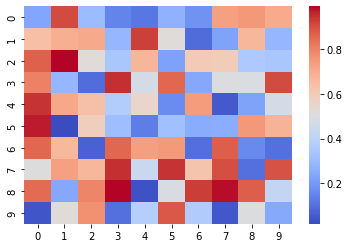

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D numpy array with random values
data = np.random.rand(10, 10)

# Create a heatmap using seaborn
sns.heatmap(data, cmap='coolwarm')

# Show the plot
plt.show()

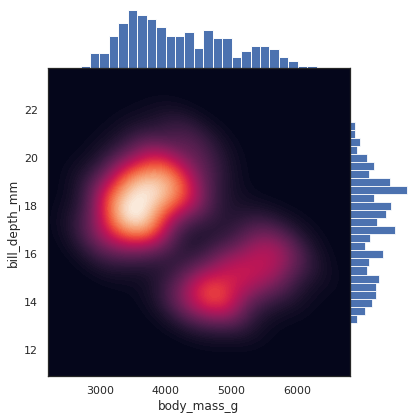

In [4]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, alpha=1, bins=25)

In [5]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [1]:
import openpyxl
from openpyxl import load_workbook

wb = load_workbook('conn.xlsx')
sheets = wb.worksheets

sheet = sheets[2]

In [2]:
rows = sheet.max_row - 1
column = sheet.max_column - 1

In [3]:
inte = []
for i in range(column):
    inte.append(sheet.cell(1, i + 2).value)

In [4]:
inte

[9, 7, 5, 3, 1, 'z', 2, 4, 6, 8, 10]

In [5]:
chan = []
for i in range(rows):
    chan.append(sheet.cell(i + 2, 1).value)

In [6]:
chan

['Fp', 'AF', 'F', 'FT/FC', 'T/C', 'TP/CP', 'P', 'PO', 'O', 'l']

In [7]:
data = []
for i in range(rows):
    row = []
    for j in range(column):
        row.append(sheet.cell(i + 2, j + 2).value)
    data.append(row)
data

[[0,
  0,
  0,
  0,
  1.442107081413269,
  2.287094086408615,
  1.536264806985855,
  0,
  0,
  0,
  0],
 [0, 0, 0, 3.153379440307617, 0, 0, 0, 3.9104726314544678, 0, 0, 0],
 [0,
  2.3574477434158325,
  3.4579417407512665,
  3.1781125664711,
  3.586617559194565,
  3.3180201053619385,
  3.739918887615204,
  3.272745728492737,
  3.6367908120155334,
  2.5218240916728973,
  0],
 [0,
  3.0482697784900665,
  4.449086248874664,
  4.21099665760994,
  4.6284791231155396,
  4.480542004108429,
  4.541580021381378,
  4.298831194639206,
  4.430511474609375,
  3.0047012865543365,
  0],
 [0,
  2.5725662410259247,
  4.392329275608063,
  4.6506451070308685,
  4.523932099342346,
  4.778794705867767,
  4.576739579439163,
  4.664364278316498,
  4.3154172003269196,
  3.001942068338394,
  0],
 [0,
  2.8290368020534515,
  4.391214847564697,
  4.627181053161621,
  4.668427050113678,
  4.396935880184174,
  4.250559389591217,
  4.300173133611679,
  4.539915174245834,
  2.0316244065761566,
  0],
 [0,
  4.14743357

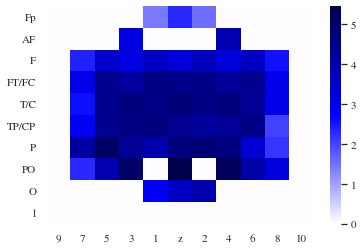

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
from matplotlib import font_manager

fontdict = {'family': 'STIXGeneral'}

# Create a 2D numpy array with random values
data = np.array(data)

# Create a heatmap using seaborn
# terrain_r
sns.set_theme(font='STIXGeneral')

sns.heatmap(data, cmap="seismic_r", xticklabels=inte, yticklabels=chan, center=0)

# Show the plot
plt.show()

In [20]:
import pandas as pd

x = []
y = []

for i in range(column):
    for j in range(rows):
        x = np.hstack((x, (np.random.rand(round(data[j ,i] * 10)) + i)))
        y = np.hstack((y, (np.random.rand(round(data[j ,i] * 10)) + rows - j)))
ds = []
for i in range(len(x)):
    ds.append([x[i], y[i]])

df = pd.DataFrame(ds, columns=('x','y'))

In [21]:
df

,x,y
0,1.919127,8.894358
1,1.176279,8.718121
2,1.778411,8.488696
3,1.338119,8.546704
4,1.535556,8.918091
...,...,...
2279,9.464004,3.677229
2280,9.561740,3.356114
2281,9.487710,3.549293
2282,9.503492,3.429111


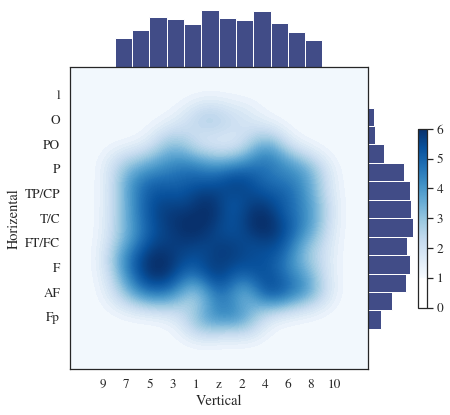

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import cycler
from matplotlib import cm

colormap = cm.get_cmap(name='Blues') # 获取蓝色渐近色
cycles = 6
c = [colormap(i) for i in np.linspace(0, 1, cycles)]
myCycler = cycler(color=c)
norm = mpl.colors.Normalize(vmin=1, vmax=cycles)

sns.set_theme(style="white", font='STIXGeneral', font_scale=1.2)
g = sns.JointGrid(data=df, x="x", y="y", space=0)
joint = g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0,
             levels=100,
             cmap="Blues")
g.set_axis_labels(xlabel='Vertical', ylabel='Horizental')
g.ax_joint.set_xticks(ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
g.ax_joint.set_xticklabels(inte)
g.ax_joint.set_yticks(ticks=[2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5])
chan.reverse()
g.ax_joint.set_yticklabels(chan)
plt.gca().set_prop_cycle(myCycler)
cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="Blues"),ax=plt.gca()) # 设置colormap
cb.set_ticks([0,1,2,3,4,5,6])
g.plot_marginals(sns.histplot, color="#414C87", alpha=1, bins=12)

In [1]:
import openpyxl
from openpyxl import load_workbook

wb = load_workbook('conn.xlsx')
sheets = wb.worksheets

sheet = sheets[2]

In [2]:
rows = sheet.max_row - 1
column = sheet.max_column - 1

In [3]:
inte = []
for i in range(column):
    inte.append(sheet.cell(1, i + 2).value)

In [4]:
chan = []
for i in range(rows):
    chan.append(sheet.cell(i + 2, 1).value)

In [5]:
data = []
for i in range(rows):
    row = []
    for j in range(column):
        row.append(sheet.cell(i + 2, j + 2).value)
    data.append(row)

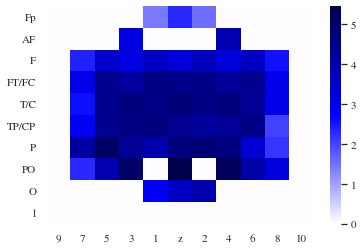

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
from matplotlib import font_manager

fontdict = {'family': 'STIXGeneral'}

# Create a 2D numpy array with random values
data = np.array(data)

# Create a heatmap using seaborn
# terrain_r
sns.set_theme(font='STIXGeneral')

sns.heatmap(data, cmap="seismic_r", xticklabels=inte, yticklabels=chan, center=0)

# Show the plot
plt.show()

In [7]:
import pandas as pd

x = []
y = []

for i in range(column):
    for j in range(rows):
        x = np.hstack((x, (np.random.rand(round(data[j ,i] * 10)) + i)))
        y = np.hstack((y, (np.random.rand(round(data[j ,i] * 10)) + rows - j)))
ds = []
for i in range(len(x)):
    ds.append([x[i], y[i]])

df = pd.DataFrame(ds, columns=('x','y'))

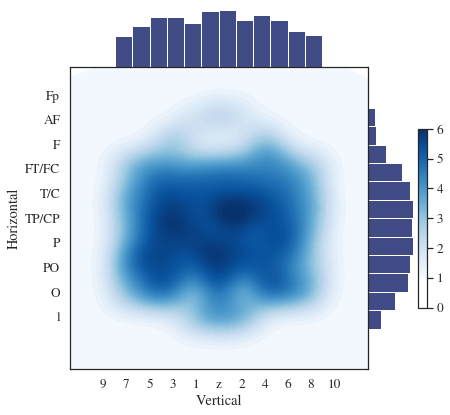

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import cycler
from matplotlib import cm

colormap = cm.get_cmap(name='Blues') # 获取蓝色渐近色
cycles = 6
c = [colormap(i) for i in np.linspace(0, 1, cycles)]
myCycler = cycler(color=c)
norm = mpl.colors.Normalize(vmin=1, vmax=cycles)

sns.set_theme(style="white", font='STIXGeneral', font_scale=1.2)
g = sns.JointGrid(data=df, x="x", y="y", space=0)
joint = g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0,
             levels=100,
             cmap="Blues")
g.set_axis_labels(xlabel='Vertical', ylabel='Horizontal')
g.ax_joint.set_xticks(ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
g.ax_joint.set_xticklabels(inte)
g.ax_joint.set_yticks(ticks=[2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5])
chan.reverse()
g.ax_joint.set_yticklabels(chan)
plt.gca().set_prop_cycle(myCycler)
cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="Blues"),ax=plt.gca()) # 设置colormap
cb.set_ticks([0,1,2,3,4,5,6])
g.plot_marginals(sns.histplot, color="#414C87", alpha=1, bins=12)

In [2]:
with open('result.json','r+') as file:
    content=file.read()
    
content=json.loads(content)

In [3]:
content

{'tl': [7.922070295798282,
  7.587470924671894,
  7.193283427444597,
  6.8331873750935,
  6.505572735021512,
  6.2082108534872535,
  5.938846689959367,
  5.695309809843699,
  5.4755428522825245,
  5.277612987409035,
  5.099701595803102,
  4.940106438659131,
  4.797235659447809,
  4.669603346697598,
  4.555822865967639,
  4.45460656300808,
  4.364758163193861,
  4.285166883841157,
  4.214808458959063,
  4.152740465352933,
  4.0980957751472795],
 'tm': [4.26105888672173,
  4.007589706924046,
  3.7162484635598956,
  3.455355494841933,
  3.223024994879961,
  3.0170312598347664,
  2.835178938508034,
  2.6753735654056072,
  2.5356406085193157,
  2.4141291450709104,
  2.3091069776564837,
  2.2189560477621852,
  2.142171365395188,
  2.077353785093874,
  2.023206157310051,
  1.97853084274102,
  1.9422226816415786,
  1.9132665174081922,
  1.8907347708940505,
  1.8737818729132414,
  1.8616409469395876],
 'el': [7.235292224097066,
  6.943667259005209,
  6.60128807288905,
  6.290184825410446,
  6.0

In [4]:
tl = content['tl']
tm = content['tm']
el = content['el']
em = content['em']
ol = content['ol']
om = content['om']

In [5]:
tl

[7.922070295798282,
 7.587470924671894,
 7.193283427444597,
 6.8331873750935,
 6.505572735021512,
 6.2082108534872535,
 5.938846689959367,
 5.695309809843699,
 5.4755428522825245,
 5.277612987409035,
 5.099701595803102,
 4.940106438659131,
 4.797235659447809,
 4.669603346697598,
 4.555822865967639,
 4.45460656300808,
 4.364758163193861,
 4.285166883841157,
 4.214808458959063,
 4.152740465352933,
 4.0980957751472795]

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager

fontdict = {'family': 'STIXGeneral'}

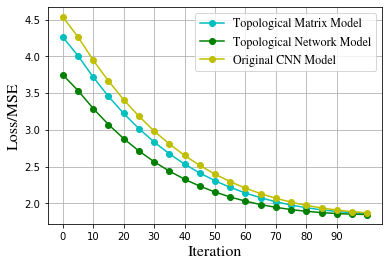

In [7]:
iterate = range(0, 100, 10)
plt.plot(tm, 'co-', em, 'go-', om, 'yo-')
plt.xlabel("Iteration", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.ylabel("Loss/MSE", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.xticks(range(0,20,2), iterate)
plt.grid(True)
plt.legend(['Topological Matrix Model', 'Topological Network Model', 'Original CNN Model'], prop={'family': 'STIXGeneral', 'size':12})
plt.show()

In [28]:
with open('enc_result.json','r+') as file:
    content=file.read()
    
content=json.loads(content)

In [29]:
content

{'loss': [28.04909974336624,
  15.675631960233053,
  9.905383661389351,
  7.219881440202395,
  5.9220607206225395,
  5.256031503280004,
  4.903250075876713,
  4.707193113863468,
  4.579336829483509,
  4.52387277657787,
  4.4870404961208505,
  4.46306511759758,
  4.453228799005349,
  4.444080187628666,
  4.437190542618433,
  4.438040014356375,
  4.434206957618395,
  4.4299001308778925,
  4.42560779551665,
  4.42831735437115],
 'MSE': [9.608073620622356,
  5.434922504580269,
  3.438721943522493,
  2.46996393368269,
  1.973994831275195,
  1.7042731363636752,
  1.5458487475523726,
  1.4491318565482894,
  1.3878409220216175,
  1.3492943039086336,
  1.3248165285835662,
  1.3079529281550397,
  1.2948177269349495,
  1.2880454698965573,
  1.2817117030421892,
  1.2772145704288655,
  1.274075577997913,
  1.2720944088185206,
  1.2702344494483744,
  1.268551613545666]}

In [30]:
loss = content['loss']
MSE = content['MSE']

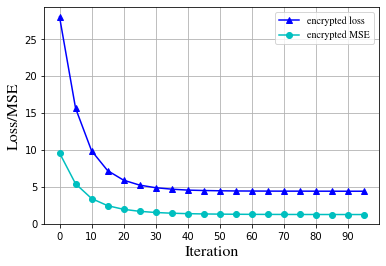

In [31]:
iterate = range(0, 100, 10)
plt.plot(loss, 'b^-', MSE, 'co-')
plt.xlabel("Iteration", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.ylabel("Loss/MSE", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.xticks(range(0,20,2), iterate)
plt.grid(True)
plt.legend(['encrypted loss', 'encrypted MSE'], prop=fontdict)
plt.show()